In [27]:
import timm
import torch
from torchsummary import summary

In [28]:
import torchvision
from torchvision import transforms
from torchvision.models.feature_extraction import create_feature_extractor

In [29]:
from ecg_dataset import EcgImage

In [30]:
data_transform = transforms.Compose([
    transforms.Resize([224, 224]),
    transforms.ToTensor(),
])

In [31]:
dataset = EcgImage(
    root = 'ecg_id_img/train',
    transform=data_transform,
    triplet_batch=(4, 4)
)
tst_input = dataset[0][0].unsqueeze(0).to('cuda')

root: ecg_id_img/train


In [32]:
model_features = timm.create_model('regnety_002',
                                   features_only=True,
                                   num_classes=90,
                                   pretrained=True,
                                   out_indices=[1, 2, 3, 4]).to('cuda')

In [33]:
multi_features = model_features(tst_input)
processed = []

In [34]:
for i, feat in enumerate(multi_features):
    print(feat.shape)

torch.Size([1, 24, 56, 56])
torch.Size([1, 56, 28, 28])
torch.Size([1, 152, 14, 14])
torch.Size([1, 368, 7, 7])


In [39]:
ft_imgs = multi_features[0].squeeze(0)
distance_matrix = torch.cdist(ft_imgs, ft_imgs, p=3)

In [40]:
distance_matrix

tensor([[[0.0000, 0.0000, 1.0951,  ..., 0.8829, 0.4789, 0.0000],
         [0.0000, 0.0000, 1.0951,  ..., 0.8829, 0.4789, 0.0000],
         [1.0951, 1.0951, 0.0000,  ..., 0.3494, 0.6922, 1.0951],
         ...,
         [0.8829, 0.8829, 0.3494,  ..., 0.0000, 0.4465, 0.8829],
         [0.4789, 0.4789, 0.6922,  ..., 0.4465, 0.0000, 0.4789],
         [0.0000, 0.0000, 1.0951,  ..., 0.8829, 0.4789, 0.0000]],

        [[0.0000, 0.2730, 3.5086,  ..., 3.4552, 3.3269, 0.3808],
         [0.2730, 0.0000, 3.2688,  ..., 3.2153, 3.0875, 0.3503],
         [3.5086, 3.2688, 0.0000,  ..., 0.1694, 0.3329, 3.1502],
         ...,
         [3.4552, 3.2153, 0.1694,  ..., 0.0000, 0.1778, 3.0980],
         [3.3269, 3.0875, 0.3329,  ..., 0.1778, 0.0000, 2.9710],
         [0.3808, 0.3503, 3.1502,  ..., 3.0980, 2.9710, 0.0000]],

        [[0.0000, 1.1846, 3.6708,  ..., 3.7465, 3.1053, 0.9891],
         [1.1846, 0.0000, 2.8437,  ..., 2.8967, 2.1667, 0.6773],
         [3.6708, 2.8437, 0.0000,  ..., 0.5399, 1.3431, 3.

In [25]:
for i, feat in enumerate(multi_features):
    feature_map = feat.squeeze(0)
    gray_scale = torch.sum(feature_map, 0)
    # 求平均值
    gray_scale = gray_scale / feature_map.shape[0]
    print(gray_scale.shape)
    processed.append(gray_scale.data.cpu().numpy())

torch.Size([56, 56])
torch.Size([28, 28])
torch.Size([14, 14])
torch.Size([7, 7])


(56, 56)
(28, 28)
(14, 14)
(7, 7)


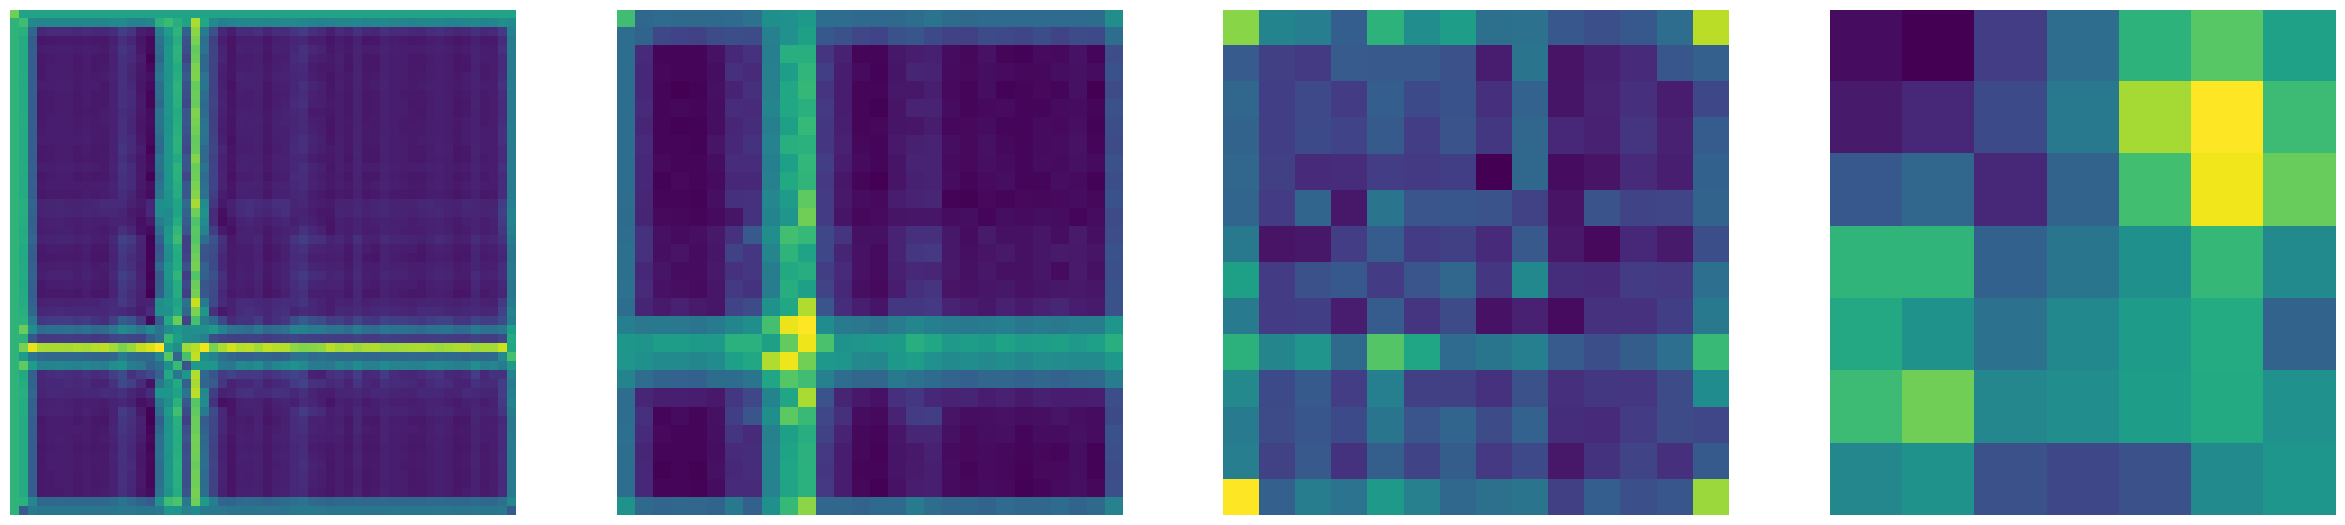

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 50))

for i in range(len(processed)):   # len(processed) = 17
    print(processed[i].shape)
    a = fig.add_subplot(5, 4, i+1)
    img_plot = plt.imshow(processed[i])
    a.axis("off")